In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
from tensorflow.keras.datasets import cifar10
# import tensorflow as tf

In [47]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [48]:
x_train.shape

(50000, 32, 32, 3)

In [49]:
x_train[0].shape

(32, 32, 3)

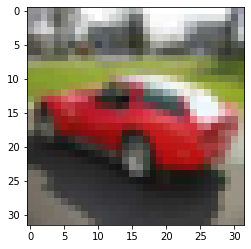

In [50]:
plt.imshow(x_train[255])

In [51]:
x_train[0].max()

255

In [52]:
x_train = x_train/255

In [53]:
x_test = x_test/255

In [54]:
x_test.shape

(10000, 32, 32, 3)

In [55]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [56]:
from tensorflow.keras.utils import to_categorical

In [57]:
y_cat_train = to_categorical(y_train,10)

In [58]:
y_cat_test = to_categorical(y_test,10)

In [59]:
y_train[0]

array([6], dtype=uint8)

In [60]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

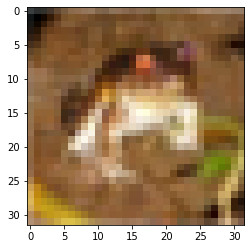

In [61]:
plt.imshow(x_train[0])

In [62]:
from tensorflow.keras.models import Sequential

In [63]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [64]:
model = Sequential()

In [65]:
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [69]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 33s 652us/sample - loss: 1.4667 - accuracy: 0.4747 - val_loss: 1.2546 - val_accuracy: 0.5490
Epoch 2/15
50000/50000 [==============================] - 31s 625us/sample - loss: 1.1629 - accuracy: 0.5900 - val_loss: 1.1001 - val_accuracy: 0.6165
Epoch 3/15
50000/50000 [==============================] - 30s 598us/sample - loss: 1.0147 - accuracy: 0.6456 - val_loss: 1.0013 - val_accuracy: 0.6486
Epoch 4/15
50000/50000 [==============================] - 30s 608us/sample - loss: 0.9035 - accuracy: 0.6857 - val_loss: 1.0015 - val_accuracy: 0.6543
Epoch 5/15
50000/50000 [==============================] - 30s 607us/sample - loss: 0.8086 - accuracy: 0.7174 - val_loss: 0.9294 - val_accuracy: 0.6814
Epoch 6/15
50000/50000 [==============================] - 31s 610us/sample - loss: 0.7308 - accuracy: 0.7429 - val_loss: 0.9403 - val_accuracy: 0.6831
Epoch 7/15
50000/50000 [====================

In [70]:
metrics = pd.DataFrame(model.history.history)

In [71]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.466671,0.47468,1.254591,0.5490
1,1.162940,0.58996,1.100120,0.6165
2,1.014684,0.64562,1.001263,0.6486
3,0.903546,0.68570,1.001468,0.6543
4,0.808600,0.71738,0.929356,0.6814
5,0.730797,0.74288,0.940280,0.6831
6,0.660844,0.76828,0.921310,0.6932
7,0.594004,0.79018,1.006276,0.6794
8,0.537666,0.80932,1.026741,0.6898


In [72]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

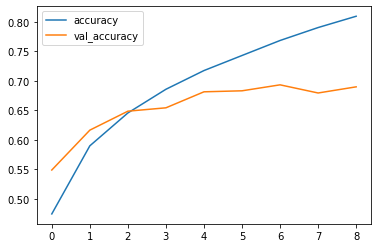

In [74]:
metrics[['accuracy', 'val_accuracy']].plot()

In [75]:
metrics[['loss', 'val_loss']].plt()

AttributeError: 'DataFrame' object has no attribute 'plt'

In [76]:
model.evaluate(x_test, y_cat_test,verbose=0)

[1.026740566635132, 0.6898]

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
predications = model.predict_classes(x_test)

In [79]:
print(classification_report(y_test, predications))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.84      0.75      0.79      1000
           2       0.57      0.60      0.58      1000
           3       0.50      0.51      0.50      1000
           4       0.65      0.66      0.66      1000
           5       0.65      0.53      0.58      1000
           6       0.75      0.77      0.76      1000
           7       0.72      0.77      0.74      1000
           8       0.84      0.75      0.79      1000
           9       0.69      0.84      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [82]:
confusion_matrix(y_test, predications)

array([[734,  14,  62,  19,  24,   3,  11,  16,  60,  57],
       [ 27, 752,  11,  13,   4,   4,  12,   4,  24, 149],
       [ 60,   8, 598,  73,  83,  56,  73,  26,   8,  15],
       [ 22,  10,  84, 505,  71, 131,  75,  63,   7,  32],
       [ 17,   5,  86,  72, 661,  18,  50,  72,  15,   4],
       [ 14,   9,  70, 199,  57, 526,  28,  75,   6,  16],
       [ 10,  13,  63,  63,  36,  16, 767,  12,   5,  15],
       [ 17,   6,  48,  41,  61,  38,   3, 768,   3,  15],
       [ 85,  31,  22,  12,  11,   7,   4,   9, 747,  72],
       [ 23,  52,   9,  17,   9,   5,   6,  25,  14, 840]], dtype=int64)

<AxesSubplot:>

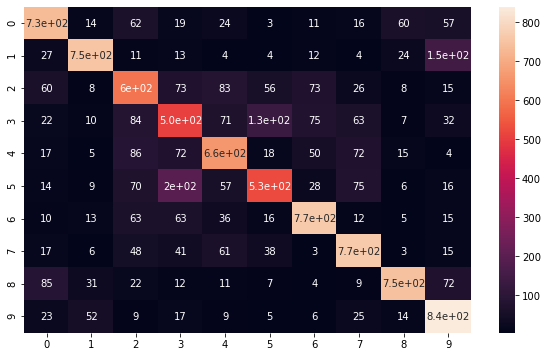

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predications), annot=True)

In [85]:
my_image = x_test[0]

In [86]:
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

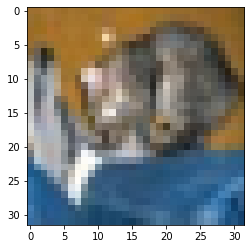

In [87]:
plt.imshow(my_image)

In [88]:
y_test[0]

array([3])

In [89]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)